# K-Means Clustering

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## 1. โหลด csv เข้าไปใน Python Pandas

In [2]:
df = pd.read_csv('data_student.csv')

## 2. เขียนโค้ดแสดง หัว10แถว ท้าย10แถว และสุ่ม10แถว



In [3]:
df.head(10)

,STG,SCG,STR,LPR,PEG,UNS
0,0.00,0.00,0.00,0.00,0.00,very_low
1,0.08,0.08,0.10,0.24,0.90,High
2,0.06,0.06,0.05,0.25,0.33,Low
3,0.10,0.10,0.15,0.65,0.30,Middle
4,0.08,0.08,0.08,0.98,0.24,Low
5,0.09,0.15,0.40,0.10,0.66,Middle
6,0.10,0.10,0.43,0.29,0.56,Middle
7,0.15,0.02,0.34,0.40,0.01,very_low
8,0.20,0.14,0.35,0.72,0.25,Low
9,0.00,0.00,0.50,0.20,0.85,High


In [4]:
df.tail(10)

,STG,SCG,STR,LPR,PEG,UNS
248,0.89,0.68,0.49,0.65,0.90,High
249,0.72,0.60,0.45,0.79,0.45,Middle
250,0.68,0.63,0.65,0.09,0.66,Middle
251,0.56,0.60,0.60,0.31,0.50,Middle
252,0.54,0.51,0.55,0.64,0.19,Low
253,0.61,0.78,0.69,0.92,0.58,High
254,0.78,0.61,0.71,0.19,0.60,Middle
255,0.54,0.82,0.71,0.29,0.77,High
256,0.50,0.75,0.81,0.61,0.26,Middle
257,0.66,0.90,0.76,0.87,0.74,High


In [5]:
df.sample(10)

,STG,SCG,STR,LPR,PEG,UNS
231,0.610,0.330,0.36,0.28,0.28,Low
136,0.380,0.100,0.40,0.48,0.26,Low
63,0.200,0.680,0.73,0.48,0.28,Low
189,0.490,0.900,0.52,0.90,0.47,High
15,0.120,0.120,0.75,0.35,0.80,High
103,0.245,0.260,0.38,0.49,0.27,Low
73,0.300,0.200,0.52,0.30,0.53,Middle
250,0.680,0.630,0.65,0.09,0.66,Middle
148,0.345,0.299,0.10,0.64,0.13,Low
190,0.445,0.700,0.82,0.16,0.64,Middle


## 3. ใช้ info และ describe อธิบายข้อมูลเบื้องต้น


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 258 entries, 0 to 257
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   STG     258 non-null    float64
 1   SCG     258 non-null    float64
 2   STR     258 non-null    float64
 3   LPR     258 non-null    float64
 4   PEG     258 non-null    float64
 5    UNS    258 non-null    object 
dtypes: float64(5), object(1)
memory usage: 12.2+ KB


Note :  
ไม่มี missing values

In [7]:
df.describe()

,STG,SCG,STR,LPR,PEG
count,258.000000,258.000000,258.000000,258.000000,258.000000
mean,0.371147,0.355674,0.468004,0.432713,0.458539
std,0.210271,0.211962,0.245940,0.248108,0.255211
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.240750,0.210000,0.291250,0.250000,0.250000
50%,0.327000,0.302500,0.490000,0.330000,0.500000
75%,0.495000,0.497500,0.690000,0.647500,0.660000
max,0.990000,0.900000,0.950000,0.990000,0.930000


## 4. ใช้ pairplot ดูความสัมพันธ์เบื้องต้น


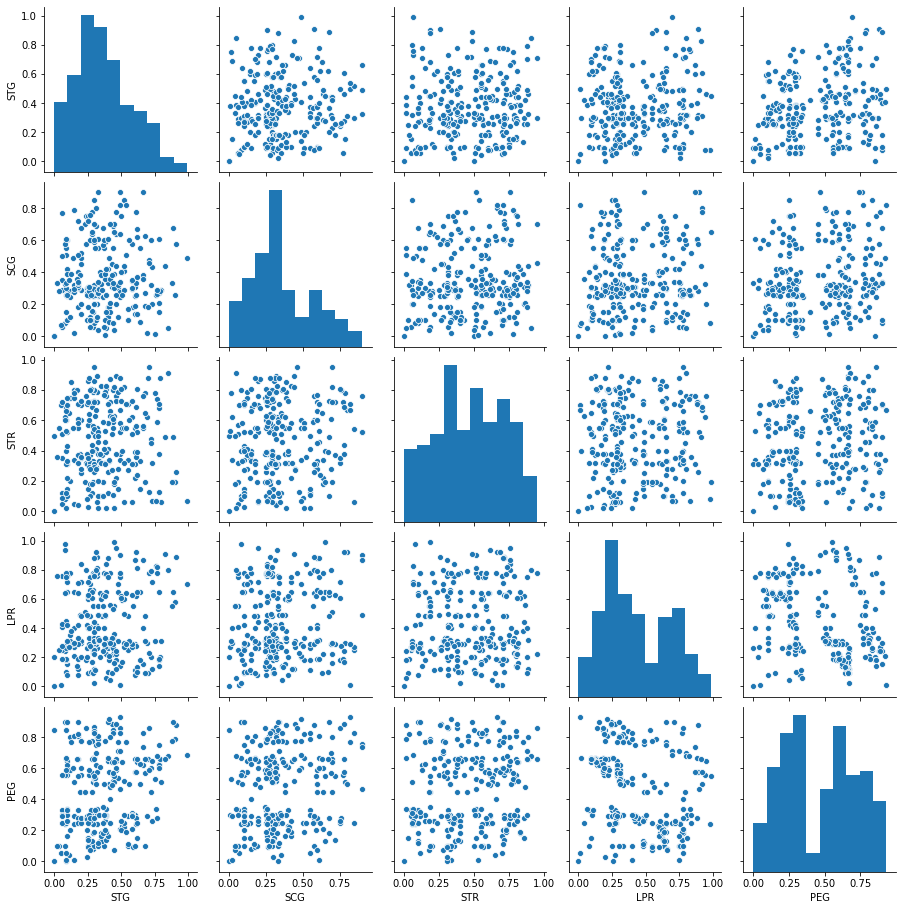

In [8]:
sns.pairplot(df)

Note :  
ความสัมพันธ์ระหว่าง features ดูไม่ค่อยมีทิศทางที่แน่นอน ค่า correlation น่าจะมีค่าน้อย

## 5. หา Correlation ของแต่ละฟีเจอร์



In [9]:
df.corr()

,STG,SCG,STR,LPR,PEG
STG,1.000000,0.081035,0.040841,0.099543,0.206359
SCG,0.081035,1.000000,0.083732,0.097816,0.182792
STR,0.040841,0.083732,1.000000,0.036481,0.120779
LPR,0.099543,0.097816,0.036481,1.000000,-0.269574
PEG,0.206359,0.182792,0.120779,-0.269574,1.000000


## 6.   สร้าง Scatter Plot ของข้อมูลที่มี Correlation มากที่สุดและน้อยที่สุด


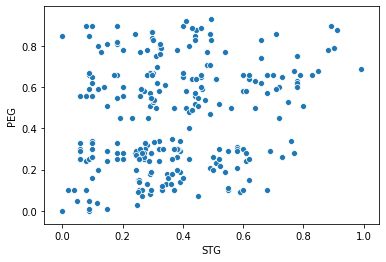

In [10]:
# most correlated pair : STG & PEG (0.206359)
sns.scatterplot(data=df, x='STG', y='PEG')

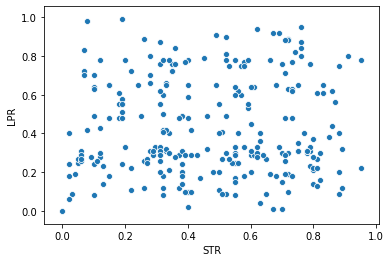

In [11]:
# least correlated pair : STR & LPR (0.036481)
sns.scatterplot(data=df, x='STR', y='LPR')

## 7.สร้าง Distribution Plot ของแต่ละฟีเจอร์


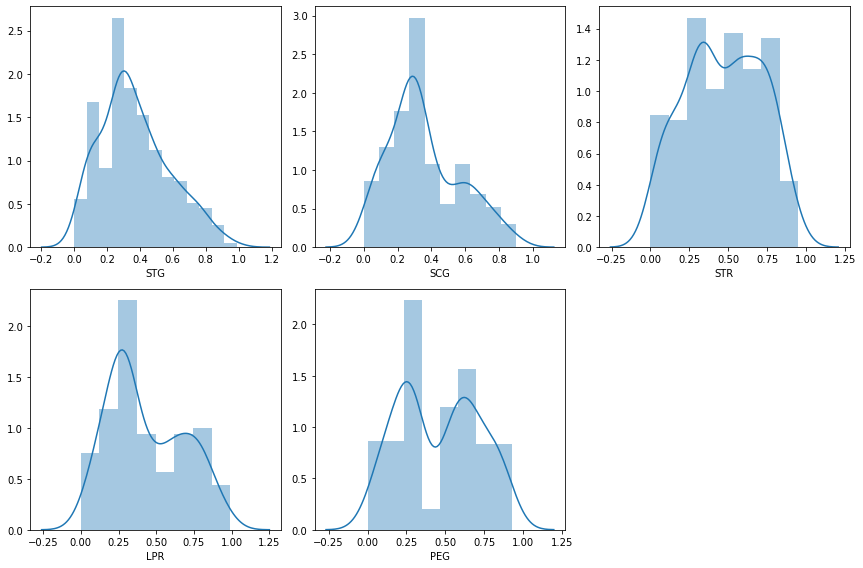

In [12]:
fig = plt.figure(figsize=(12,8))

for i,col in enumerate(df.columns) :
    if col != ' UNS':
        plt.subplot(2,3,i+1)
        sns.distplot(df[col])
fig.tight_layout()

## 8.สร้าง Box Plot ของแต่ละฟีเจอร์

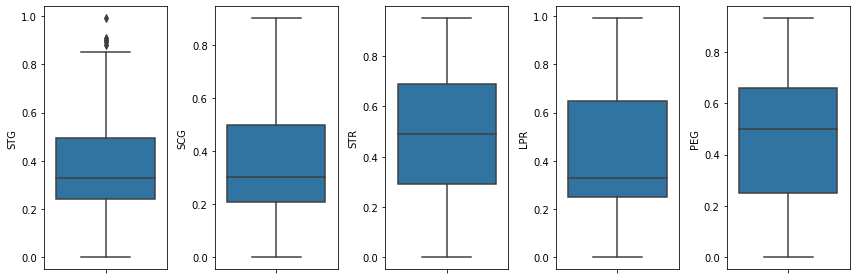

In [13]:
fig = plt.figure(figsize=(12,4))

for i,col in enumerate(df.columns) :
    if col != ' UNS':
        plt.subplot(1,5,i+1)
        sns.boxplot(df[col], orient='v')
fig.tight_layout()

Note : STG เป็น feature เดียวที่มี Outliers

In [14]:
# ตรวจสอบจำนวน outliers
Q1 = df['STG'].describe()[4]
Q3 = df['STG'].describe()[6]
IQR = Q3 - Q1
upper_fence = Q3 + (1.5 * IQR)

# จำนวน outliers
(df['STG'] > upper_fence).sum()

5

## 9.เลือกฟีเจอร์ STG กับ PEG สร้าง K-Means ให้ K=2


In [15]:
X = df[['STG','PEG']].values
X

array([[0.   , 0.   ],
       [0.08 , 0.9  ],
       [0.06 , 0.33 ],
       [0.1  , 0.3  ],
       [0.08 , 0.24 ],
       [0.09 , 0.66 ],
       [0.1  , 0.56 ],
       [0.15 , 0.01 ],
       [0.2  , 0.25 ],
       [0.   , 0.85 ],
       [0.18 , 0.81 ],
       [0.06 , 0.3  ],
       [0.1  , 0.34 ],
       [0.1  , 0.9  ],
       [0.2  , 0.6  ],
       [0.12 , 0.8  ],
       [0.05 , 0.05 ],
       [0.1  , 0.33 ],
       [0.15 , 0.29 ],
       [0.2  , 0.56 ],
       [0.12 , 0.2  ],
       [0.18 , 0.66 ],
       [0.1  , 0.65 ],
       [0.18 , 0.28 ],
       [0.06 , 0.25 ],
       [0.09 , 0.85 ],
       [0.04 , 0.1  ],
       [0.09 , 0.25 ],
       [0.08 , 0.56 ],
       [0.15 , 0.81 ],
       [0.12 , 0.59 ],
       [0.15 , 0.24 ],
       [0.1  , 0.16 ],
       [0.18 , 0.82 ],
       [0.2  , 0.78 ],
       [0.06 , 0.29 ],
       [0.1  , 0.26 ],
       [0.18 , 0.33 ],
       [0.09 , 0.   ],
       [0.19 , 0.45 ],
       [0.02 , 0.1  ],
       [0.2  , 0.78 ],
       [0.14 , 0.6  ],
       [0.1

In [16]:
X.shape

(258, 2)

In [17]:
from sklearn.cluster import KMeans

In [18]:
# define clustering
kmeans = KMeans(n_clusters=2, random_state=100)
# fit
kmeans_label = kmeans.fit_predict(X)
kmeans_label

array([0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1], dtype=int32)

## 10. หาค่า cluster coordinates, inertia และ iteration ของ K-Means


In [19]:
# cluster coordinates
kmeans.cluster_centers_

array([[0.32184677, 0.22115323],
       [0.41676866, 0.67820896]])

In [20]:
# inertia (WCSS)
kmeans.inertia_

14.067984155031295

In [21]:
# number of iterations
kmeans.n_iter_

6

## 11. สร้าง Clustering Visualization


In [22]:
# X0, Y0
X0 = X[kmeans_label==0][:,0]
Y0 = X[kmeans_label==0][:,1]
# X1, Y1
X1 = X[kmeans_label==1][:,0]
Y1 = X[kmeans_label==1][:,1]

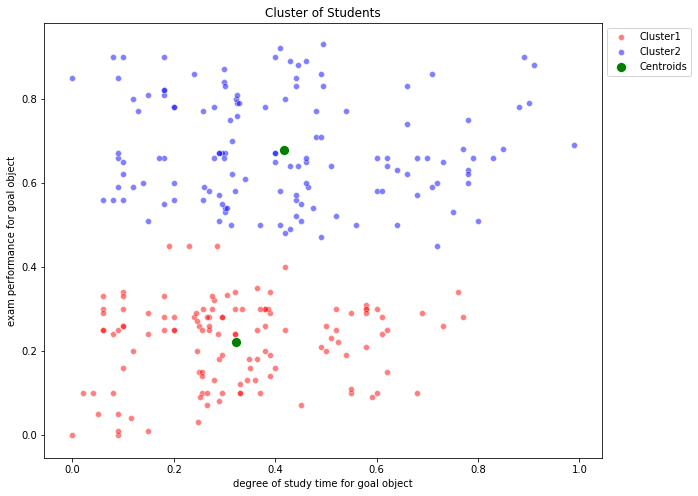

In [23]:
fig = plt.figure(figsize=(10,8))
sns.scatterplot(X0, Y0, color='r', label='Cluster1', alpha=0.5)
sns.scatterplot(X1, Y1, color='b', label='Cluster2', alpha=0.5)
sns.scatterplot(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], color='g', s=100, label='Centroids')
plt.xlabel('degree of study time for goal object')
plt.ylabel('exam performance for goal object')
plt.legend(bbox_to_anchor=(1,1))
plt.title('Cluster of Students')
plt.show()

## 12.  ทำ Elbow Method หาค่า K ที่เหมาะสมที่สุด และทำ Elbow Method Visualization



In [24]:
# Elbow Method on 2 features
WCSS = []
for i in range(1,20):
    kmeans = KMeans(n_clusters=i, random_state=100)
    kmeans_label = kmeans.fit_predict(X)
    WCSS.append(kmeans.inertia_)

In [25]:
WCSS

[28.10207051550388,
 14.067984155031295,
 9.13228020868021,
 6.719604969646099,
 5.3375378581244615,
 4.437302970840729,
 3.559780781983398,
 3.1203715581065268,
 2.710734492201846,
 2.3648951170122205,
 2.118135068047221,
 1.7787917820938655,
 1.6247030353233725,
 1.5353115209054833,
 1.4166392172175652,
 1.3062973547515129,
 1.188899145704521,
 1.1088833879971634,
 1.0241207634418081]

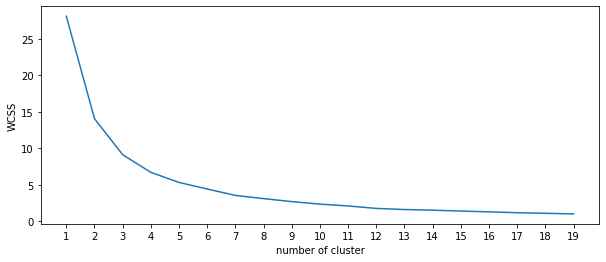

In [26]:
k = [i for i in range(1,20)]

fig = plt.figure(figsize=(10,4))
sns.lineplot(x=k, y=WCSS)
plt.ylabel('WCSS')
plt.xlabel('number of cluster')
plt.xticks(np.arange(min(k), max(k)+1, 1.0))
plt.show()

Note : เลือก k=3

## 13.   สร้าง K-Means ด้วย ค่า K จาก Elbow Method และหาค่า cluster coordinates, inertia และ iteration ใหม่


In [27]:
# define clustering
kmeans = KMeans(n_clusters=3, random_state=100)
# fit
kmeans_label = kmeans.fit_predict(X)
kmeans_label

array([1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 2, 0, 0, 0, 0, 2, 1, 1, 2,
       2, 1, 1, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 1,
       1, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 1, 1, 2, 2, 1, 1, 2, 2, 2, 1, 2,
       2, 1, 1, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2], dtype=int32)

In [28]:
# cluster coordinates
kmeans.cluster_centers_

array([[0.29789899, 0.68171717],
       [0.30986325, 0.21284615],
       [0.71452381, 0.61690476]])

In [29]:
# inertia (WCSS)
kmeans.inertia_

9.13228020868021

In [30]:
# number of iterations
kmeans.n_iter_

3

## 14.   สร้าง Clustering Visualization ของ K-Means


In [31]:
# create color set for use
colors = ['r','b','y','g']

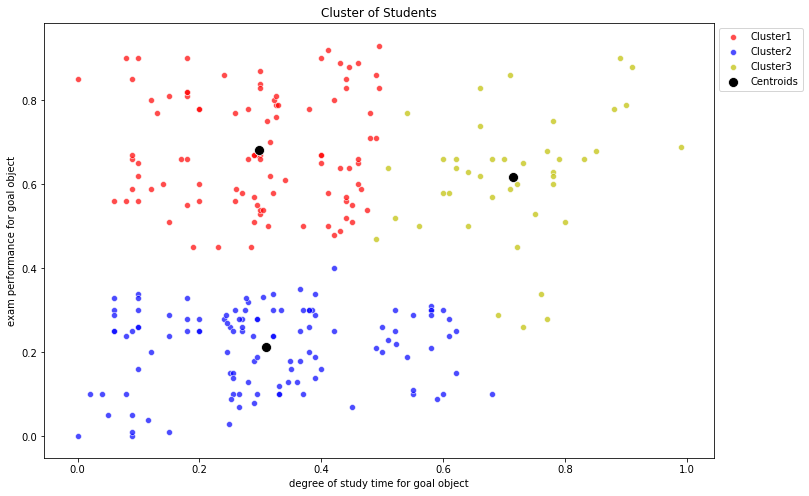

In [32]:
# number of clusters
k = 3

fig = plt.figure(figsize=(12,8))

# plot clusters
for i in range(k):
    sns.scatterplot(X[kmeans_label==i][:,0], X[kmeans_label==i][:,1], color=colors[i], 
                    label='Cluster'+str(i+1), alpha=0.7)
# plot centroids
sns.scatterplot(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], color='black', 
                s=100, label='Centroids')

plt.xlabel('degree of study time for goal object')
plt.ylabel('exam performance for goal object')
plt.legend(bbox_to_anchor=(1,1))
plt.title('Cluster of Students')
plt.show()

## 15.  เลือกฟีเจอร์ใดก็ได้ 2 ฟีเจอร์ที่ไม่ซ้ำเดิม สร้าง K-Means ให้ K=2


In [33]:
# เลือก STR & LPR
X = df[['STR','LPR']].values
X

array([[0.   , 0.   ],
       [0.1  , 0.24 ],
       [0.05 , 0.25 ],
       [0.15 , 0.65 ],
       [0.08 , 0.98 ],
       [0.4  , 0.1  ],
       [0.43 , 0.29 ],
       [0.34 , 0.4  ],
       [0.35 , 0.72 ],
       [0.5  , 0.2  ],
       [0.55 , 0.3  ],
       [0.51 , 0.41 ],
       [0.52 , 0.78 ],
       [0.7  , 0.15 ],
       [0.7  , 0.3  ],
       [0.75 , 0.35 ],
       [0.7  , 0.01 ],
       [0.1  , 0.08 ],
       [0.05 , 0.27 ],
       [0.25 , 0.49 ],
       [0.2  , 0.78 ],
       [0.37 , 0.12 ],
       [0.31 , 0.29 ],
       [0.32 , 0.42 ],
       [0.35 , 0.76 ],
       [0.68 , 0.18 ],
       [0.55 , 0.25 ],
       [0.6  , 0.45 ],
       [0.62 , 0.94 ],
       [0.8  , 0.21 ],
       [0.75 , 0.31 ],
       [0.75 , 0.65 ],
       [0.7  , 0.76 ],
       [0.04 , 0.19 ],
       [0.28 , 0.31 ],
       [0.12 , 0.43 ],
       [0.22 , 0.72 ],
       [0.32 , 0.08 ],
       [0.31 , 0.26 ],
       [0.38 , 0.49 ],
       [0.36 , 0.76 ],
       [0.6  , 0.2  ],
       [0.55 , 0.29 ],
       [0.6

In [34]:
# create clustering
kmeans = KMeans(n_clusters=2, random_state=100)
# fit 
kmeans_label = kmeans.fit_predict(X)
kmeans_label

array([0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1], dtype=int32)

## 16. หาค่า cluster coordinates ของ K-Means ของฟีเจอร์ใหม่


In [35]:
# cluster coordinates
kmeans.cluster_centers_

array([[0.47480392, 0.25143791],
       [0.45809524, 0.69685714]])

## 17. หาค่า inertia และ iteration ของ K-Means ของฟีเจอร์ใหม่


In [36]:
# inertia
kmeans.inertia_

18.99415968253968

In [37]:
# number of iteration
kmeans.n_iter_

3

## 18. สร้าง Clustering Visualization ของฟีเจอร์ใหม่


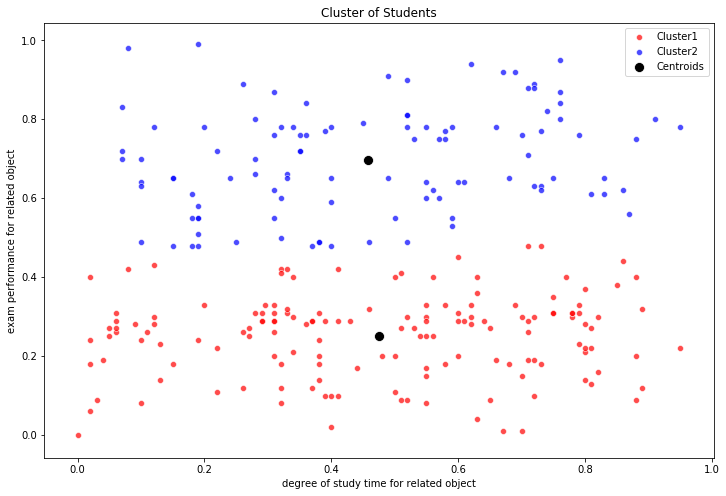

In [38]:
# number of clusters
k = 2

fig = plt.figure(figsize=(12,8))

# plot clusters
for i in range(2):
    sns.scatterplot(X[kmeans_label==i][:,0], X[kmeans_label==i][:,1], color=colors[i], 
                    label='Cluster'+str(i+1), alpha=0.7)
# plot centroids
sns.scatterplot(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], color='black', 
                s=100, label='Centroids')

plt.xlabel('degree of study time for related object')
plt.ylabel('exam performance for related object')
plt.legend(bbox_to_anchor=(1,1))
plt.title('Cluster of Students')
plt.show()

## 19. ทำ Elbow Method หาค่า K ที่เหมาะสมที่สุด ของฟีเจอร์ใหม่ และทำ Elbow Method Visualization


In [39]:
# Elbow Method
WCSS = []
for i in range(1,20):
    kmeans = KMeans(n_clusters=i, random_state=100)
    kmeans_label = kmeans.fit_predict(X)
    WCSS.append(kmeans.inertia_)

In [40]:
WCSS

[31.365297771317827,
 18.99415968253968,
 10.970351049382717,
 7.199671293842101,
 5.898640708852507,
 5.185228845970018,
 4.491205868287542,
 3.8400296205756153,
 3.350805863720498,
 3.0618083246341863,
 2.7759246892563954,
 2.482447780497852,
 2.2518273080912143,
 2.049261222142902,
 1.8459018764862924,
 1.690438784661417,
 1.582213784661417,
 1.4570276541252862,
 1.4073888592534916]

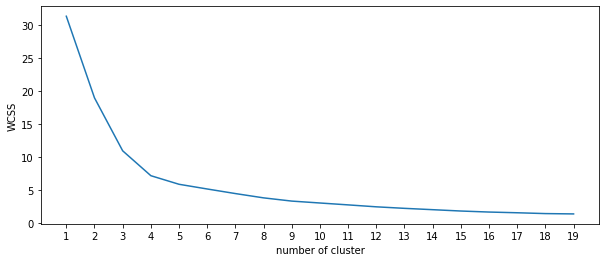

In [41]:
k = [i for i in range(1,20)]

fig = plt.figure(figsize=(10,4))
sns.lineplot(x=k, y=WCSS)
plt.ylabel('WCSS')
plt.xlabel('number of cluster')
plt.xticks(np.arange(min(k), max(k)+1, 1.0))
plt.show()

Note : เลือก k = 4

## 20. สร้าง K-Means ด้วย ค่า K จาก Elbow Method หาค่า cluster coordinates, inertia และ iteration


In [42]:
# define clustering 
kmeans = KMeans(n_clusters=4, random_state=100)
# fit 
kmeans_label = kmeans.fit_predict(X)
kmeans_label

array([1, 1, 1, 3, 3, 1, 1, 1, 3, 2, 2, 2, 0, 2, 2, 2, 2, 1, 1, 3, 3, 1,
       1, 1, 3, 2, 2, 2, 0, 2, 2, 0, 0, 1, 1, 1, 3, 1, 1, 3, 3, 2, 2, 0,
       2, 2, 2, 2, 0, 1, 1, 3, 3, 1, 1, 1, 3, 2, 2, 0, 0, 2, 2, 2, 0, 1,
       1, 3, 1, 1, 1, 1, 3, 2, 2, 2, 0, 2, 2, 2, 0, 1, 1, 3, 3, 1, 1, 1,
       3, 2, 2, 0, 0, 2, 2, 0, 0, 1, 1, 1, 3, 1, 1, 3, 3, 2, 2, 2, 0, 2,
       2, 2, 0, 1, 1, 3, 3, 3, 1, 1, 3, 3, 2, 2, 2, 0, 2, 2, 0, 0, 1, 1,
       3, 3, 1, 1, 3, 3, 2, 2, 0, 0, 2, 2, 0, 0, 1, 1, 3, 3, 1, 1, 3, 3,
       2, 2, 2, 0, 2, 2, 0, 0, 1, 1, 3, 1, 1, 3, 3, 1, 2, 2, 0, 0, 2, 2,
       0, 0, 1, 1, 3, 3, 1, 1, 3, 3, 2, 2, 0, 0, 2, 2, 2, 0, 1, 1, 3, 3,
       1, 1, 3, 3, 2, 2, 0, 0, 2, 2, 2, 0, 1, 1, 3, 3, 2, 1, 3, 3, 2, 2,
       0, 0, 2, 2, 0, 0, 1, 1, 3, 3, 1, 1, 3, 0, 2, 2, 0, 2, 2, 2, 0, 0,
       1, 1, 3, 3, 1, 1, 0, 0, 2, 2, 0, 0, 2, 2, 0, 0], dtype=int32)

In [43]:
# centroid coordinates
kmeans.cluster_centers_

array([[0.66823529, 0.73823529],
       [0.24732877, 0.24630137],
       [0.68037037, 0.25901235],
       [0.25471698, 0.6609434 ]])

In [44]:
# inertia
kmeans.inertia_

7.199671293842101

In [45]:
# number of iteration
kmeans.n_iter_

7

## 21. สร้าง Clustering Visualization ของ K-Means ที่ได้ค่า K จาก Elbow Method ของฟีเจอร์ใหม่


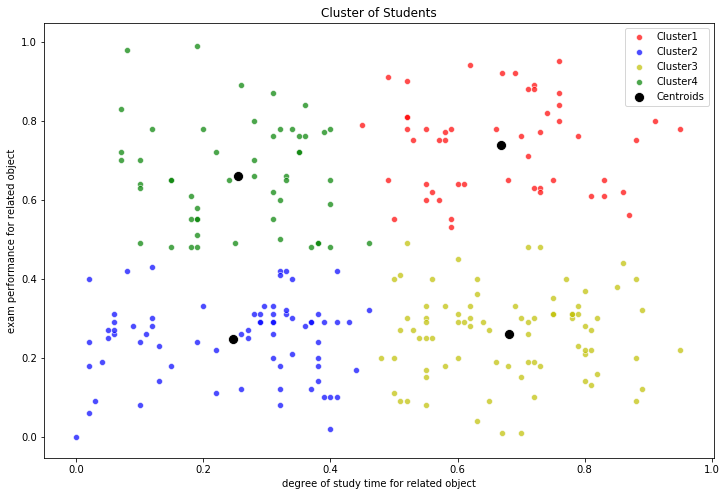

In [46]:
# number of cluster
k = 4

fig = plt.figure(figsize=(12,8))

# plot clusters
for i in range(k):
    sns.scatterplot(X[kmeans_label==i][:,0], X[kmeans_label==i][:,1], color=colors[i], 
                    label='Cluster'+str(i+1), alpha=0.7)
# plot centroids
sns.scatterplot(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], color='black', 
                s=100, label='Centroids')

plt.xlabel('degree of study time for related object')
plt.ylabel('exam performance for related object')
plt.legend(bbox_to_anchor=(1,1))
plt.title('Cluster of Students')
plt.show()